<a href="https://colab.research.google.com/github/clarissa-souza/Projeto-Airflow-Taskflow_API/blob/main/Airflow_taskflow_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ajustes no docker-compose.yaml criando o volume onde vou guardar o arquivo original e o arquivo tratado

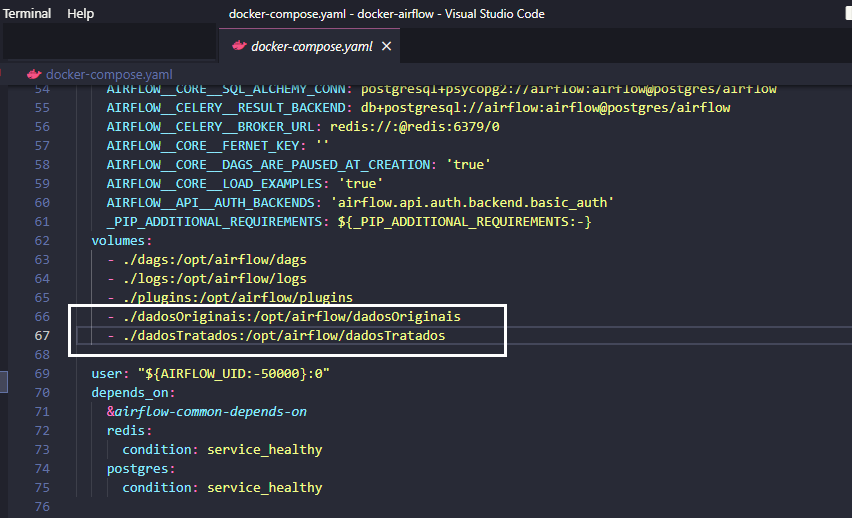

Verificando se o container está up
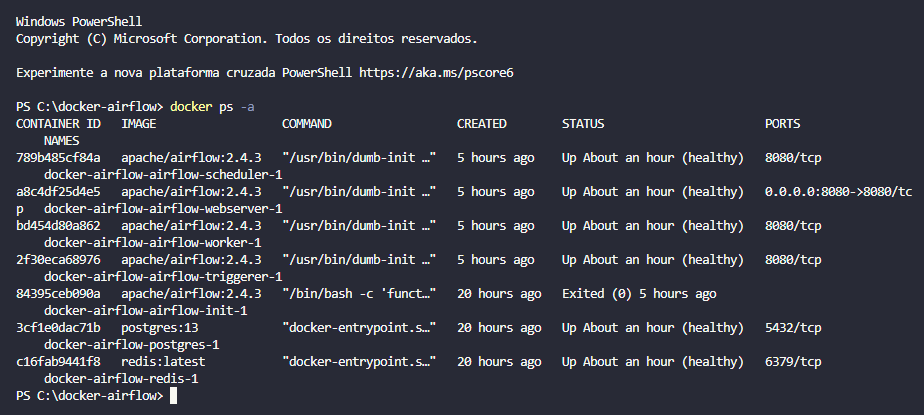

# Codificando

In [ ]:
# Importando as bibliotecas 

import os
import json
import zipfile
import requests
import pandas as pd
from datetime import datetime, timedelta
from airflow.decorators import dag, task 

In [ ]:
# Definindo o argumentos default

default_args = {
        'owner': 'Clarissa Souza',
        'depends_on_past': False,
        'email': ['clarissasouza950@gmail.com'],
        'email_on_failure': False,
        'retries': 1,
        'retry_delay': timedelta(minutes=1)
      }

In [ ]:
# Dag e suas Tasks

@dag (dag_id='airflow_taskflow_api_v01',
      default_args=default_args,
      start_date = datetime(2022,11,30),
      schedule_interval='@daily', 
      catchup=False )

def etl_censo_educacao():

  @task
  def dados_2018():
    os.makedirs ('dadosOriginais',exist_ok = True)
    url='https://download.inep.gov.br/microdados/microdados_censo_da_educacao_superior_2018.zip'
    response = requests.get(url, verify=False).content
    open('dadosOriginais/microdados_censo_da_educacao_superior_2018.zip','wb').write(response)

  @task
  def dados_2019():
    os.makedirs ('dadosOriginais',exist_ok = True)
    url='https://download.inep.gov.br/microdados/microdados_censo_da_educacao_superior_2019.zip'
    response = requests.get(url, verify=False).content
    open('dadosOriginais/microdados_censo_da_educacao_superior_2019.zip','wb').write(response)

  @task
  def dados_2020():
    os.makedirs ('dadosOriginais',exist_ok = True)
    url='https://download.inep.gov.br/microdados/microdados_censo_da_educacao_superior_2020.zip'
    response = requests.get(url, verify=False).content
    open('dadosOriginais/microdados_censo_da_educacao_superior_2020.zip','wb').write(response)

  @task
  def dados_2021():
    os.makedirs ('dadosOriginais',exist_ok = True)
    url='https://download.inep.gov.br/microdados/microdados_censo_da_educacao_superior_2021.zip'
    response = requests.get(url, verify=False).content
    open('dadosOriginais/microdados_censo_da_educacao_superior_2021.zip','wb').write(response)

  @task
  def extracao():
    cwd = os.getcwd()
    columns = ['NU_ANO_CENSO','NO_REGIAO','SG_UF','TP_GRAU_ACADEMICO','QT_VG_TOTAL','QT_INSCRITO_TOTAL']
    with zipfile.ZipFile (cwd + '/dadosOriginais/microdados_censo_da_educacao_superior_2018.zip') as z:
      with z.open('Microdados do Censo da Educaç╞o Superior 2018/dados/MICRODADOS_CADASTRO_CURSOS_2018.CSV') as f:
        df=pd.read_csv(f,encoding='ISO-8859-1',sep=';', usecols=columns)
    with zipfile.ZipFile (cwd + '/dadosOriginais/microdados_censo_da_educacao_superior_2019.zip') as z:
      with z.open('Microdados do Censo da Educaç╞o Superior 2019/dados/MICRODADOS_CADASTRO_CURSOS_2019.CSV') as f:
        df1=pd.read_csv(f,encoding='ISO-8859-1',sep=';', usecols=columns)
    df = pd.concat([df, df1])
    with zipfile.ZipFile (cwd + '/dadosOriginais/microdados_censo_da_educacao_superior_2020.zip') as z:
      with z.open('Microdados do Censo da Educaç╞o Superior 2020/dados/MICRODADOS_CADASTRO_CURSOS_2020.CSV') as f:
        df1=pd.read_csv(f,encoding='ISO-8859-1',sep=';', usecols=columns)
    df = pd.concat([df, df1])
    with zipfile.ZipFile (cwd + '/dadosOriginais/microdados_censo_da_educacao_superior_2021.zip') as z:
      with z.open('Microdados do Censo da Educaç╞o Superior 2021/dados/MICRODADOS_CADASTRO_CURSOS_2021.CSV') as f:
        df1=pd.read_csv(f,encoding='ISO-8859-1',sep=';', usecols=columns)
    df = pd.concat([df, df1])
    dados=df.to_json(orient = 'table')
    return dados

  @task
  def tratamento(dados):
    df2=pd.read_json(dados,orient = 'table')
    df2.rename(columns={'NU_ANO_CENSO':'ano','NO_REGIAO':'regiao','SG_UF':'UF','TP_GRAU_ACADEMICO':'grau_academico','QT_VG_TOTAL':'vagas_totais','QT_INSCRITO_TOTAL':'inscritos_totais'},inplace=True)
    df2 = df2.groupby(['ano','regiao','UF','grau_academico']).sum()
    dados2=df2.to_json(orient = 'table')
    return dados2

  @task
  def grava_dados(dados2):
    os.makedirs ('dadosTratados',exist_ok = True)
    out_file = open('dadosTratados/Censo_regiao.json', "w")
    json.dump(dados2, out_file, indent = 6)  
    out_file.close()  
  
  dados_2018()
  dados_2019()
  dados_2020()
  dados_2021()
  dados=extracao()
  dados2=tratamento(dados=dados)
  grava_dados(dados2=dados2)

executa_dag=etl_censo_educacao()

Execucao no airflow!
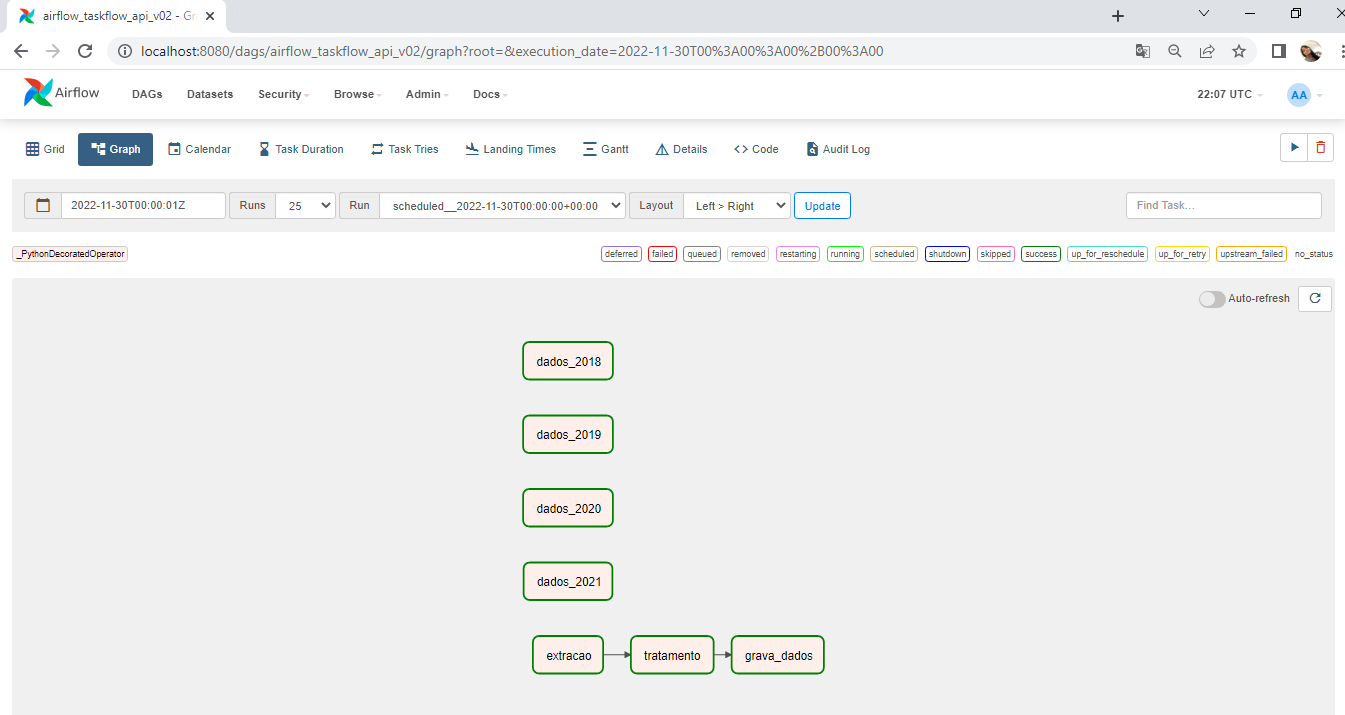

Arquivos Originais

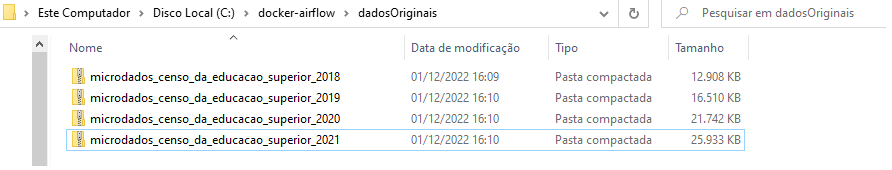

Arquivo Tratado

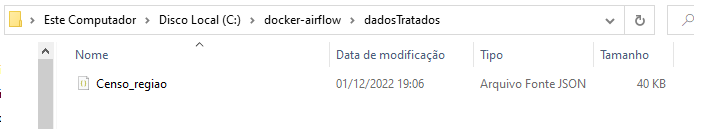